<a href="https://colab.research.google.com/github/luimui/DataScience/blob/main/part1_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An immune clock of human pregnancy

## Load the data

Load the data from `multiomics_data.pickle` using `pickle`. You will get a [pandas](https://pandas.pydata.org/docs/user_guide/10min.html) DataFrame containing preprocessed data from the paper (the original data from their paper is a bit messy). The data contains several meta attributes as well as the different modalities.

Meta attributes include:

* `Gates ID`, `MRN`, `Study Subject ID Number`: different IDs of a patient
* `Sex`: sex of the baby
* `timepoint`: 1-3 correspond to the three trimesters, 4 corresponds to postpartum
* `gestational_age`: time of sampling

There are many different modalities. We only want to focus on the `immune_system`:
    
* `cellfree_rna`
* `metabolomics`
* `microbiome`
* `plasma_luminex`
* `serum_luminex`
* `immune_system`
* `plasma_somalogic`

If you are interested in the rest, take a look at [this paper](https://academic.oup.com/bioinformatics/article/35/1/95/5047759).

In [46]:
# code for loading the data

import numpy as np
import pickle
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

with open("/content/drive/MyDrive/DataScienceWS202324/Project/part1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)

data_multiomics.head(5)
type(data_multiomics)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


pandas.core.frame.DataFrame

In [47]:

# look at the immune system
data_multiomics["immune_system"].head(5)
data = data_multiomics["immune_system"]

print(data.isnull().values.any())

data.dtypes
data.head(5)
data.shape

False


(68, 534)

## Task 1: Predict Gestational Age

Use what you learned in the lecture and the tutorials to:

1. **Predict `gestational_age`** using the `immune_system` modality using at least two models (e.g., LinearRegression, LASSO, Ridge, ElasticNet, ...)

2. **Evaluate** your models using a measure that you think fits best and report the result. If it is a different measure than in the paper, please briefly explain why.

(54, 534) (14, 534) (54,) (14,)
The model performance for testing set
--------------------------------------
MAE is 9.119047520504761
MSE is 119.99247900207537
R2 score is 0.31424872042200924
score: 0.31424872042200924
intercept: -18.030834117070075
[-0.44529679 -0.09054696 -0.23936203  0.60745075  0.22625434]


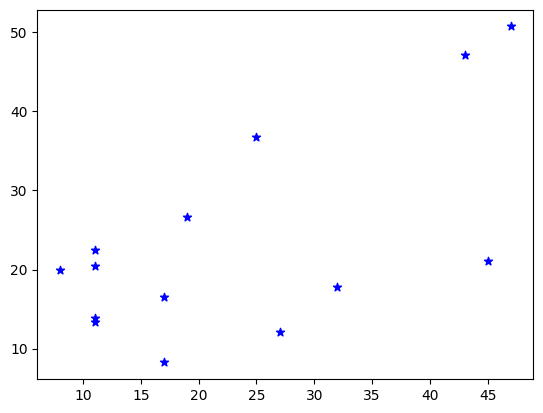

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV




X = data
#X = X.sample(n=5,axis='columns')
y = data_multiomics["gestational_age"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# hyper_params = [{'n_features_to_select': list(range(1, X.shape[1]))}]

# rfe = RFE(model)
# model_cv = GridSearchCV(estimator = rfe,
#                         param_grid = hyper_params,
#                         scoring= 'r2',
#                         cv = 2,
#                         verbose = 1,
#                         return_train_score=True)


# model_cv.fit(X_train, y_train)

# y_pred = model_cv.predict(X_test)

# model evaluation for testing set

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print("score: {}".format(model.score(X_test, y_test)))
#print("coeff: {}".format(model.coef_))
print("intercept: {}".format(model.intercept_))


plt.scatter(y_test,y_pred,c="blue",marker="*")


scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
print(scores)

In [5]:
model = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print("score: {}".format(model.score(X_test, y_test)))
#print("coeff: {}".format(model.coef_))
print("intercept: {}".format(model.intercept_))

The model performance for testing set
--------------------------------------
MAE is 8.538733726748335
MSE is 103.42004690868175
R2 score is 0.40895937735882837
score: 0.40895937735882837
intercept: -4.71121272248423


In [6]:
model = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train);
print("alpha: {}".format(model.alpha_))
print("intercept: {}".format(model.intercept_))
y_pred = model.predict(X_test)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+00, tolerance: 7.526e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.217e-01, tolerance: 7.526e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.491e+00, tolerance: 7.526e

alpha: 0.33555772810598194
intercept: 41.32484744856066
The model performance for testing set
--------------------------------------
MAE is 8.538733726748335
MSE is 103.42004690868175
R2 score is 0.40895937735882837


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.040e+00, tolerance: 6.687e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+00, tolerance: 6.687e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.521e+00, tolerance: 6.687e

In [17]:
scaler = MinMaxScaler()
X = data
#X = X.sample(n=5,axis='columns')
y = data_multiomics["gestational_age"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.head(5)



,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


In [28]:
X = data
my_list = X.columns.values.tolist()
X = MinMaxScaler().fit_transform(X)

X = pd.DataFrame(X, columns=my_list)
X.head(5)

model = ElasticNetCV(cv=10, random_state=0).fit(X_train, y_train);
print("alpha: {}".format(model.alpha_))
print("intercept: {}".format(model.intercept_))
y_pred = model.predict(X_test)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.370e+00, tolerance: 8.413e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.253e+00, tolerance: 8.413e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.744e+00, tolerance: 8.413e

alpha: 0.20393146094989414
intercept: 48.504126334483956
The model performance for testing set
--------------------------------------
MAE is 8.538733726748335
MSE is 103.42004690868175
R2 score is 0.40895937735882837


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.015e+00, tolerance: 8.617e-01
  model = cd_fast.enet_coordinate_descent(


In [29]:
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = X.corr()
corr_matrix

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0_Bcells,1.000000,-0.019644,-0.116579,-0.195476,-0.270817,0.265069,0.282151,-0.300598,-0.097637,0.043459,...,0.233820,0.038950,-0.163775,-0.134652,-0.115011,-0.213403,-0.118495,-0.202927,-0.166727,-0.163465
1_CD16+CD56-NKcells,-0.019644,1.000000,-0.099955,-0.256585,-0.297486,0.063416,0.198388,0.018241,0.611480,0.099725,...,-0.099368,-0.140418,0.154367,0.116327,-0.091001,0.173160,-0.083785,-0.178964,-0.123718,-0.052155
2_CD4+Tcells_mem,-0.116579,-0.099955,1.000000,-0.210969,0.393222,-0.478505,0.255410,0.051025,-0.167255,0.157324,...,0.132619,0.146380,0.042213,0.019794,-0.097715,-0.374551,0.092723,-0.154319,0.113200,-0.011639
3_CD4+Tcells_naive,-0.195476,-0.256585,-0.210969,1.000000,0.814598,0.670463,0.021215,0.050073,-0.424839,-0.603630,...,-0.337600,-0.348014,-0.087201,-0.142461,0.135779,0.119337,0.045994,0.203644,0.006898,-0.053088
4_CD4+Tcells,-0.270817,-0.297486,0.393222,0.814598,1.000000,0.334717,0.150575,0.079073,-0.488362,-0.474795,...,-0.243100,-0.237331,-0.055177,-0.121027,0.088503,-0.083929,0.112185,0.118499,0.084166,-0.038630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529_Tbet+CD4+Tcells_naive_STAT5_Unstim,-0.213403,0.173160,-0.374551,0.119337,-0.083929,-0.016440,-0.471436,0.084338,0.203664,-0.210966,...,-0.380757,-0.211800,-0.123356,-0.142953,0.488919,1.000000,0.228686,0.531693,0.156876,0.254355
530_Tbet+CD8+Tcells_mem_STAT5_Unstim,-0.118495,-0.083785,0.092723,0.045994,0.112185,-0.021123,-0.150990,-0.172525,-0.144667,-0.056782,...,0.504344,0.613138,0.509652,0.439120,0.821217,0.228686,1.000000,0.831962,0.928340,0.596921
531_Tbet+CD8+Tcells_naive_STAT5_Unstim,-0.202927,-0.178964,-0.154319,0.203644,0.118499,0.018195,-0.471430,-0.006519,-0.133033,-0.276665,...,0.282243,0.456750,0.427024,0.294394,0.851295,0.531693,0.831962,1.000000,0.766969,0.538080
532_TCRgd+Tcells_STAT5_Unstim,-0.166727,-0.123718,0.113200,0.006898,0.084166,-0.041876,-0.148438,-0.234455,-0.263529,0.096042,...,0.573427,0.611343,0.531955,0.480721,0.730828,0.156876,0.928340,0.766969,1.000000,0.569597


In [34]:
from sklearn.decomposition import PCA

# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.
pca = PCA(0.95)
pca.fit(X_train)
print(pca.n_components_)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


model = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train);
print("alpha: {}".format(model.alpha_))
print("intercept: {}".format(model.intercept_))
y_pred = model.predict(X_test)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))



8
alpha: 1.5297179983893026
intercept: 24.38888888888889
The model performance for testing set
--------------------------------------
MAE is 8.538733726748335
MSE is 103.42004690868175
R2 score is 0.40895937735882837


In [44]:
data_multiomics

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                            
0                    T  PTLG002  16661779                   10565    Male   
1                    T  PTLG002  16661779                   10565    Male   
2                    T  PTLG002  16661779                   10565    Male   
3                    T  PTLG002  16661779                   10565    Male   
4                    T  PTLG004  23587868                   10603  Female   
..                 ...      ...       ...                     ...     ...   
63                   T  PTLG029  40310948                   10631  Female   
64                   T  PTLG016  20328266                   30101    Male   
65                   T  PTLG016  20328266                   30101    Male   
66                   T  PTLG016  20328266                   30101    Male   
67                   T  PTLG016  20328266                   30101    Male   

   sex_bin timepoint gestational_age cellfree_rna                ...  \
                                        0_C2orf76      1_ACTL10  ...   
0        1         1              11     0.312437 -1.892930e-16  ...   
1        1         2              18     0.312437 -1.892930e-16  ...   
2        1         3              32     0.312437 -1.892930e-16  ...   
3        1         4              45     0.312437 -1.892930e-16  ...   
4        0         1              11     5.204209  1.734736e+00  ...   
..     ...       ...             ...          ...           ...  ...   
63       0         4              46     0.312437 -1.892930e-16  ...   
64       1         1              10     0.000000  0.000000e+00  ...   
65       1         2              19     0.000000  0.000000e+00  ...   
66       1         3              31     0.000000  0.000000e+00  ...   
67       1         4              47     0.000000  0.000000e+00  ...   

   plasma_somalogic                                               \
        1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1   
0            4804.4      2233.0     3610.9     715.8       151.4   
1            4086.0      2160.5     2260.4     825.2       161.0   
2            4328.0      1818.4     2445.2    1241.8       194.6   
3            3442.4      2661.4     3879.2     703.6       153.7   
4            4261.9      1804.6     1470.6     526.8       163.0   
..              ...         ...        ...       ...         ...   
63           4391.7      2458.9     3245.9     582.9       243.3   
64           3622.7      2625.1     3154.4     414.9       164.2   
65           5090.5      2206.1     2860.7     706.7       176.6   
66           5043.6      1894.1     1905.7     938.7       211.6   
67           4296.6      2278.2     2777.4     668.0       165.0   

                                                             
   1295_SERPINF1 1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0        37885.8    1479.1    3261.8      561.3      3227.0  
1        41821.5    1465.1    1839.8      597.8      3366.0  
2        45526.1    1428.3    3057.2      625.7      8703.7  
3        36862.5    1063.6    7339.7      593.2      2918.9  
4        38938.3    1170.1    1036.8      552.8      3457.1  
..           ...       ...       ...        ...         ...  
63       33475.3    1322.6   19361.7     1750.4      3012.4  
64       40142.8    1417.0    2424.4      725.2      3066.3  
65       38453.5    1811.2    1737.5      737.2      3340.8  
66       47249.5    2521.8    1026.5      667.2      5981.0  
67       45130.9    1781.2    5904.1      697.3      3246.2  

[68 rows x 61274 columns]

## Task 2: Read the paper and explore the data

Think about and answer the following questions:

1. How many samples are there in the dataset?
2. How many pregnant women are there in the dataset?
3. What are the timepoints of the samples?
4. How many features are there in the dataset? Describe the feature groups.

## Bonus: Sex of the baby

In [50]:
data_multiomics

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                            
0                    T  PTLG002  16661779                   10565    Male   
1                    T  PTLG002  16661779                   10565    Male   
2                    T  PTLG002  16661779                   10565    Male   
3                    T  PTLG002  16661779                   10565    Male   
4                    T  PTLG004  23587868                   10603  Female   
..                 ...      ...       ...                     ...     ...   
63                   T  PTLG029  40310948                   10631  Female   
64                   T  PTLG016  20328266                   30101    Male   
65                   T  PTLG016  20328266                   30101    Male   
66                   T  PTLG016  20328266                   30101    Male   
67                   T  PTLG016  20328266                   30101    Male   

   sex_bin timepoint gestational_age cellfree_rna                ...  \
                                        0_C2orf76      1_ACTL10  ...   
0        1         1              11     0.312437 -1.892930e-16  ...   
1        1         2              18     0.312437 -1.892930e-16  ...   
2        1         3              32     0.312437 -1.892930e-16  ...   
3        1         4              45     0.312437 -1.892930e-16  ...   
4        0         1              11     5.204209  1.734736e+00  ...   
..     ...       ...             ...          ...           ...  ...   
63       0         4              46     0.312437 -1.892930e-16  ...   
64       1         1              10     0.000000  0.000000e+00  ...   
65       1         2              19     0.000000  0.000000e+00  ...   
66       1         3              31     0.000000  0.000000e+00  ...   
67       1         4              47     0.000000  0.000000e+00  ...   

   plasma_somalogic                                               \
        1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1   
0            4804.4      2233.0     3610.9     715.8       151.4   
1            4086.0      2160.5     2260.4     825.2       161.0   
2            4328.0      1818.4     2445.2    1241.8       194.6   
3            3442.4      2661.4     3879.2     703.6       153.7   
4            4261.9      1804.6     1470.6     526.8       163.0   
..              ...         ...        ...       ...         ...   
63           4391.7      2458.9     3245.9     582.9       243.3   
64           3622.7      2625.1     3154.4     414.9       164.2   
65           5090.5      2206.1     2860.7     706.7       176.6   
66           5043.6      1894.1     1905.7     938.7       211.6   
67           4296.6      2278.2     2777.4     668.0       165.0   

                                                             
   1295_SERPINF1 1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0        37885.8    1479.1    3261.8      561.3      3227.0  
1        41821.5    1465.1    1839.8      597.8      3366.0  
2        45526.1    1428.3    3057.2      625.7      8703.7  
3        36862.5    1063.6    7339.7      593.2      2918.9  
4        38938.3    1170.1    1036.8      552.8      3457.1  
..           ...       ...       ...        ...         ...  
63       33475.3    1322.6   19361.7     1750.4      3012.4  
64       40142.8    1417.0    2424.4      725.2      3066.3  
65       38453.5    1811.2    1737.5      737.2      3340.8  
66       47249.5    2521.8    1026.5      667.2      5981.0  
67       45130.9    1781.2    5904.1      697.3      3246.2  

[68 rows x 61274 columns]

(54, 534) (14, 534) (54,) (14,)
The model performance for testing set
--------------------------------------
MAE is 0.20288002625701868
MSE is 0.07103259456419765
R2 score is 0.6519402866354316
score: 0.6519402866354316
intercept: -0.26337867469772636
[ 0.65775122  0.43563829  0.74407265 -0.52739604 -0.06380938]


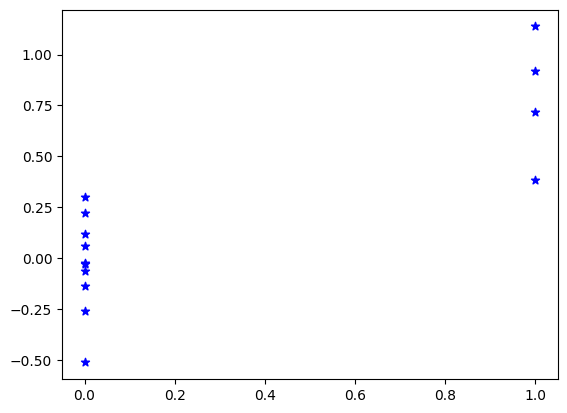

In [68]:
X = data
#X = X.sample(n=5,axis='columns')
y = data_multiomics["sex_bin"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
X_train

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)


mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print("score: {}".format(model.score(X_test, y_test)))
#print("coeff: {}".format(model.coef_))
print("intercept: {}".format(model.intercept_))


plt.scatter(y_test,y_pred,c="blue",marker="*")


scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
print(scores)

In [67]:
# scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

data = data_multiomics["immune_system"]
X = data
y = data_multiomics["sex_bin"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X = X.sample(n=5,axis='columns')


pca = PCA(0.95)
pca.fit(X_train)
print(pca.n_components_)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


model = ElasticNetCV(cv=10, random_state=0).fit(X_train, y_train);
print("alpha: {}".format(model.alpha_))
print("intercept: {}".format(model.intercept_))
y_pred = model.predict(X_test)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

22
alpha: 0.06163846516824585
intercept: 0.4444444444444445
The model performance for testing set
--------------------------------------
MAE is 0.47000699791088885
MSE is 0.2791847372730368
R2 score is -0.14000434386490035


In [58]:
model = Ridge(alpha=1).fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print("score: {}".format(model.score(X_test, y_test)))
#print("coeff: {}".format(model.coef_))
print("intercept: {}".format(model.intercept_))

The model performance for testing set
--------------------------------------
MAE is 0.47000699791088885
MSE is 0.2791847372730368
R2 score is -0.14000434386490035
score: -0.14000434386490035
intercept: 0.48148148148148145


Predict the sex of the baby. Try using a neural network in Tensorflow or PyTorch if you feel adventurous (here is a [tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html?highlight=data%20loader)).